# Function approximation with a deep neural network

> Author : Badr TAJINI - Machine Learning 2 & Deep learning - ECE 2025-2026

---

## Quartic function and training dataset

In algebra, a quartic function is a function of the form
$$
f(t)=at^{4}+bt^{3}+ct^{2}+dt+e,
$$
where $a$ is nonzero, which is defined by a polynomial of degree four, called a quartic polynomial.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch


Define and plot a quartic function

In [9]:
D_in = 1
D_out = 1

# Create random Tensors to hold inputs and outputs
x = torch.arange(-9,3.5,0.1).view(-1,1) #(-5,3.5,0.1)
y = x**4 + 2*x**3 - 12*x**2 -2*x + 6
y = torch.where(x < -5, torch.zeros_like(x), y)
N = x.shape[0]

In [10]:
print(x.size())
print(y.size())


torch.Size([125, 1])
torch.Size([125, 1])


Converting Torch Tensor to NumPy Array for plotting the function

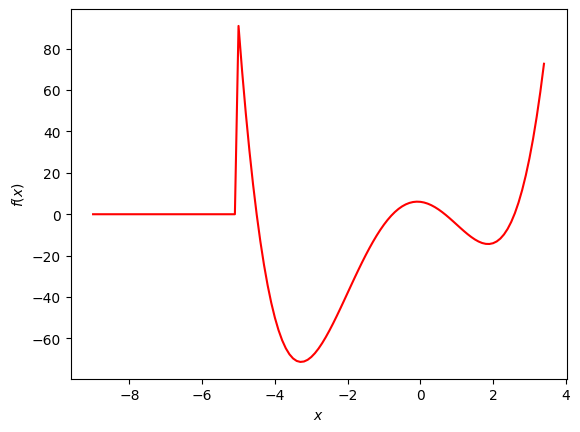

In [11]:
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()
ax.legend()
plt.show()

## Approximation with a deep neural network

### Question: code a deep neural network to approximate the function. The network will have 3 full-connected layers (followed by a ReLU activation function) and a final full-connected layer without any activation function. You will use the Adam optimizer. Choose the most appropriate loss function. You must compute the loss at each epoch.

In [12]:
# Complete this cell: model and training
import torch
import numpy as np

# create 3 hidden layers
H1 = 30
H2 = 20
H3 = 10

#**** Number of iterations (Niter) # set the checkpoint (np)
Niter = 5*10**3
saveLoss = np.zeros(Niter)

# create a simple NN with 3 hidden layers and torch.NN
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, H2),
    torch.nn.ReLU(),
    torch.nn.Linear(H2, H3),
    torch.nn.ReLU(),
    torch.nn.Linear(H3, D_out)
)

# call torch.nn.MSE()
loss_fn = torch.nn.MSELoss(reduction='mean')

# call LR = set by yourself
learning_rate = 1e-2

# call optim torch.optim.adam
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# call the loop (Niter)
for t in range(Niter):

  # set the forward pass
  y_pred = model(x)

  # compute the loss
  loss = loss_fn(y_pred, y)
  # checkpoint
  saveLoss[t] = loss.detach().numpy()
  if t % 1000 == 999:
    print(t, loss.item())
  # call optimizer
  optimizer.zero_grad()
  # call backward
  loss.backward()
  # call optmizer step
  optimizer.step()


999 5.634677886962891
1999 0.30470216274261475
2999 0.09661269932985306
3999 0.0448455885052681
4999 0.05263523757457733


Plot the training error as a function of the epoch

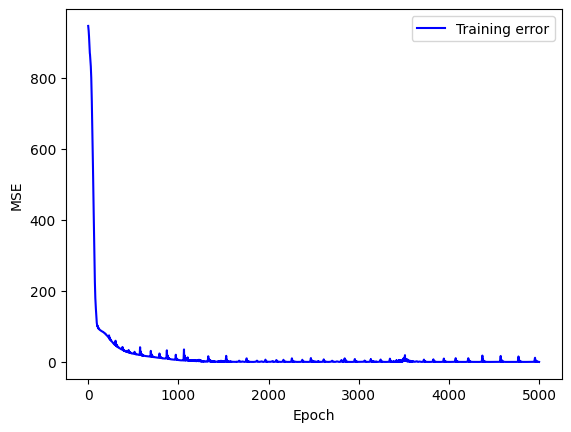

In [13]:
fig, ax = plt.subplots()
plt.plot(range(Niter),saveLoss,'b-',label='Training error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
ax.legend()
plt.show()

### Question: plot on the same graph the quartic function and its approximation

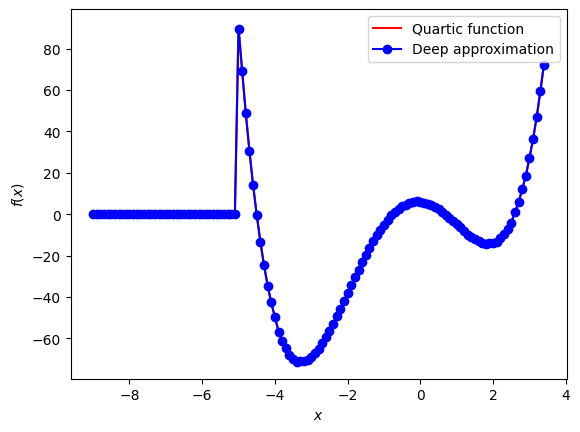

In [14]:
y_pred = model(x)
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.plot(x.numpy(), y_pred.detach().numpy(),'bo-',label='Deep approximation')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
ax.legend()
plt.show()

How many parameters?

In [15]:
# Function to count the number of parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


In [16]:
print(model.parameters)
print("\nTotal number of parameters {}\n".format(count_parameters(model)))

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=1, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=10, bias=True)
  (5): ReLU()
  (6): Linear(in_features=10, out_features=1, bias=True)
)>

Total number of parameters 901



Print all the parameters (just for seeing them)

In [17]:
for parameter in model.parameters():
    print(parameter)

Parameter containing:
tensor([[ 0.3675],
        [ 0.5391],
        [ 0.9046],
        [-0.6634],
        [-0.0587],
        [ 0.3820],
        [ 0.3198],
        [ 0.4833],
        [ 0.7952],
        [-0.3441],
        [ 0.0825],
        [ 0.1318],
        [ 0.5224],
        [ 0.2110],
        [ 0.6068],
        [-0.4621],
        [ 0.9039],
        [ 0.5520],
        [ 0.5987],
        [-0.5952],
        [-0.4415],
        [ 0.4454],
        [-0.5192],
        [ 0.8407],
        [-0.4794],
        [-0.6231],
        [ 0.3450],
        [ 0.4623],
        [ 0.7431],
        [-0.9189]], requires_grad=True)
Parameter containing:
tensor([-1.1621,  2.7351,  0.1141, -0.7345, -0.5714,  1.7812,  1.4050, -1.4104,
        -1.4066,  0.9313,  1.5894,  1.1700,  2.6597,  1.8989, -1.2930, -1.6594,
        -1.1490,  1.5160,  3.0442, -1.3007,  1.2126,  1.3644,  1.4025,  0.6488,
        -1.9886, -1.5753, -1.0893,  1.5743, -1.8256, -0.4860],
       requires_grad=True)
Parameter containing:
tensor([[ 1.2

## Approximation with a shallow neural network

### Question: code a one-hidden layer neural network with approximatively the same number of parameters than the multilayer neural network. What is the "best" architecture?

In [18]:
# Complete this cell: model and training
import torch
import numpy as np

# create 3 hidden layers
H1 = 300

#**** Number of iterations (Niter) # set the checkpoint (np)
Niter = 30*10**3
saveLoss = np.zeros(Niter)

# create a simple NN with 1 hidden layers and torch.NN
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, D_out)
)

# call torch.nn.MSE()
loss_fn = torch.nn.MSELoss(reduction='mean')

# call LR = set by yourself
learning_rate = 1e-2

# call optim torch.optim.adam
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# call the loop (Niter)
for t in range(Niter):

  # set the forward pass
  y_pred = model(x)

  # compute the loss
  loss = loss_fn(y_pred, y)
  # checkpoint
  saveLoss[t] = loss.detach().numpy()
  if t % 1000 == 999:
    print(t, loss.item())
  # call optimizer
  optimizer.zero_grad()
  # call backward
  loss.backward()
  # call optmizer step
  optimizer.step()




999 96.53968048095703
1999 95.83858489990234
2999 95.73174285888672
3999 95.6872787475586
4999 95.6690444946289
5999 95.78945922851562
6999 95.65272521972656
7999 95.63006591796875
8999 95.61080932617188
9999 95.23733520507812
10999 51.688446044921875
11999 41.63576126098633
12999 36.0064697265625
13999 32.493465423583984
14999 30.429977416992188
15999 28.01461410522461
16999 26.623645782470703
17999 25.530353546142578
18999 24.705080032348633
19999 23.870298385620117
20999 23.19996452331543
21999 22.41853904724121
22999 21.846176147460938
23999 23.133089065551758
24999 20.804370880126953
25999 20.892324447631836
26999 20.657310485839844
27999 20.256668090820312
28999 19.071557998657227
29999 18.854272842407227


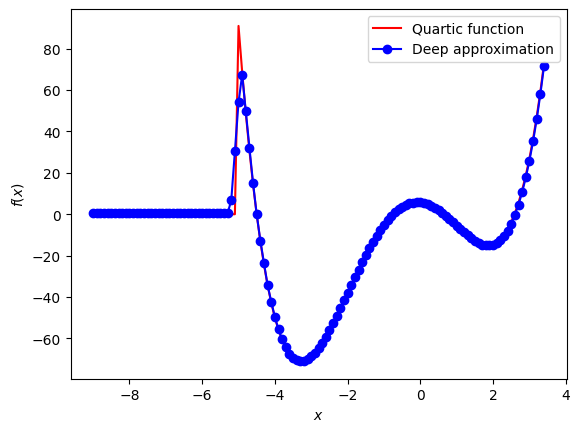

In [19]:
y_pred = model(x)
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.plot(x.numpy(), y_pred.detach().numpy(),'bo-',label='Deep approximation')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
ax.legend()
plt.show()

In [20]:
print("\nTotal number of parameters {}\n".format(count_parameters(model)))


Total number of parameters 901

